### importing the require packages

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

### loading and displaying the data using pandas

In [68]:
data = pd.read_csv("all-data.csv", encoding='ISO-8859-1')
data

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


### data cleaning and data analysis

In [69]:
data.shape

(4846, 2)

In [70]:
size_of_data = pd.DataFrame({"Row": data.shape[0], "column": data.shape[1]}, index=[0])
size_of_data

,Row,column
0,4846,2


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   News       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [72]:
new_data = data.dropna()
new_data.isna().any()

Sentiment    False
News         False
dtype: bool

### data preprocessing

In [73]:
new_data.columns

Index(['Sentiment', 'News'], dtype='object')

In [74]:
text = new_data['News']
labels = new_data['Sentiment']

In [75]:
text

0       According to Gran , the company has no plans t...
1       Technopolis plans to develop in stages an area...
2       The international electronic industry company ...
3       With the new production plant the company woul...
4       According to the company 's updated strategy f...
                              ...                        
4841    LONDON MarketWatch -- Share prices ended lower...
4842    Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843    Operating profit fell to EUR 35.4 mn from EUR ...
4844    Net sales of the Paper segment decreased to EU...
4845    Sales in Finland decreased by 10.5 % in Januar...
Name: News, Length: 4846, dtype: object

In [76]:
labels

0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842     neutral
4843    negative
4844    negative
4845    negative
Name: Sentiment, Length: 4846, dtype: object

### data visualizations

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

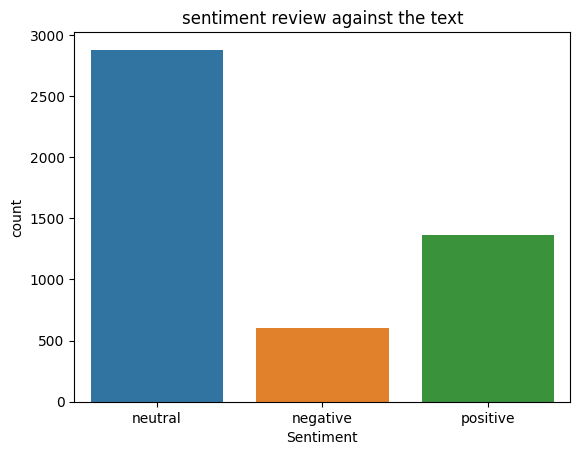

In [78]:
sns.countplot(x=labels, data=new_data)
plt.title("sentiment review against the text")
plt.show()

### model training

In [79]:
train_text, test_text, train_labels, test_labels = train_test_split(text, labels, test_size=0.25, random_state=42)

In [80]:
#using the countvectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))

#fit and transforming the train text
train_vector = vectorizer.fit_transform(train_text)

#transforming the test_text
test_vector = vectorizer.transform(test_text)

#### importing the models for predictions

In [81]:
GN = MultinomialNB()

In [82]:
GN.fit(train_vector, train_labels)

MultinomialNB()

In [83]:
pred = GN.predict(test_vector)
pred

array(['neutral', 'neutral', 'positive', ..., 'neutral', 'positive',
       'neutral'], dtype='<U8')

#### using confusion matrix to performance the data

In [84]:
matrix = confusion_matrix(test_labels, pred)
matrix

array([[ 63,  52,  28],
       [  6, 665,  42],
       [  9, 153, 194]], dtype=int64)

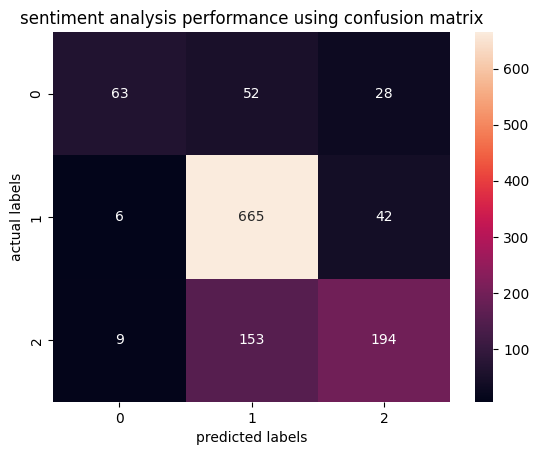

In [95]:
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel("predicted labels")
plt.ylabel("actual labels")
plt.title("sentiment analysis performance using confusion matrix")
plt.show()

#### using accuracy score to check the performance of the data

In [96]:
accuracy = accuracy_score(test_labels, pred)
print(f"Accuracy using Naive bayes is: {(accuracy * 100):2f} %")

Accuracy using Naive bayes is: 76.072607 %


In [97]:
report = classification_report(test_labels, pred)
print(report)

              precision    recall  f1-score   support

    negative       0.81      0.44      0.57       143
     neutral       0.76      0.93      0.84       713
    positive       0.73      0.54      0.63       356

    accuracy                           0.76      1212
   macro avg       0.77      0.64      0.68      1212
weighted avg       0.76      0.76      0.75      1212



In [100]:
# Function to predict sentiment of a new review
def predict_sentiment(new_text):
    new_vector = vectorizer.transform([new_text])
    pred = GN.predict(new_vector)
    return pred[0]

# Test the function
sample_review = "According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales."
print(f"The sentiment predicted by the model is: {predict_sentiment(sample_review)}")

The sentiment predicted by the model is: positive


# Financial New Sentiment Analysis
'''
    The Finanacial new data was gotton from kaggle, a nice and robust data science community with tones of datasets for data analysis and machine learning.
    The Essence of this analysis is to rate a given news based on how positive it is i.e if it is containing positive statement all through, how negative it is
    and how neutral the news might be....

    the steps i took in building a model to prodict the sentiment from the financial news datasets include
    1) downloading the datasets form kaggle
    2) using jupyter notebook to import and create my file
    3) carrying out data analysis on the data which include data cleaning, data satisitics, data preprocessing and data visualization
    4) using machine learning algorithms i.e the supervised learning algorithms  since my datasets contains both input and output to predict unseen outcome by making use of naive bayes.
    the esssence of using the naive bayes algorithms was because of it moderate performance on the outcome of the datasets, giving an efficient result when predicting unseen data
    
'''